In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import metrics

In [12]:
with open(os.path.join("sim_results", "results.pkl"), "rb") as f:
    results = pickle.load(f)

for channel_code in results:
    BERs = list(results[channel_code][metrics.THROUGHPUT].keys())
    BERs.sort()

    for metric in metrics.metrics_list:
        results[channel_code][metric] = {BER: results[channel_code][metric][BER] for BER in BERs}


print(results)

{'None': {'Throughput': {0: [294.19952764521946], 1e-09: [294.19952764521946], 1e-06: [294.19952764521946], 0.0001: [282.4315465394107], 0.0002: [270.66356543360195], 0.001: [194.17168824584488], 0.01: [0.0], 0.1: [0.0], 1: [0.0]}, 'Data': {0: [6300.0], 1e-09: [6300.0], 1e-06: [6300.0], 0.0001: [6048.0], 0.0002: [5796.0], 0.001: [4158.0], 0.01: [0.0], 0.1: [0.0], 1: [0.0]}, 'Overhead': {0: [0.0], 1e-09: [0.0], 1e-06: [0.0], 0.0001: [0.0], 0.0002: [0.0], 0.001: [0.0], 0.01: [0.0], 0.1: [0.0], 1: [0.0]}, 'Energy Consumption Node': {0: [30.01905567520209], 1e-09: [30.01905567520209], 1e-06: [30.01905567520209], 0.0001: [30.01905567520209], 0.0002: [30.01905567520209], 0.001: [30.01905567520209], 0.01: [30.01905567520209], 0.1: [30.01905567520209], 1: [30.01905567520209]}, 'Energy Efficiency Node': {0: [209.86669494751146], 1e-09: [209.86669494751146], 1e-06: [209.86669494751146], 0.0001: [201.47202714961102], 0.0002: [193.07735935171056], 0.001: [138.51201866535757], 0.01: [0.0], 0.1: [0.

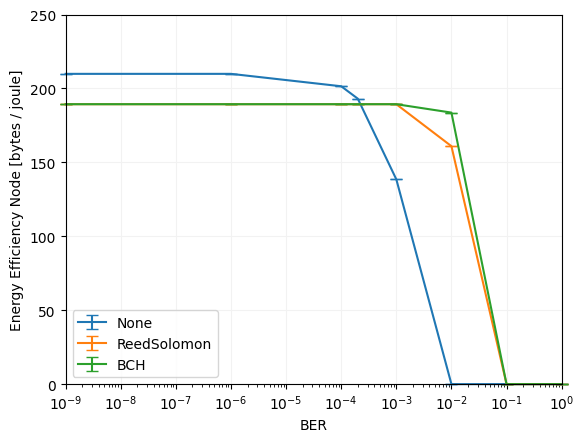

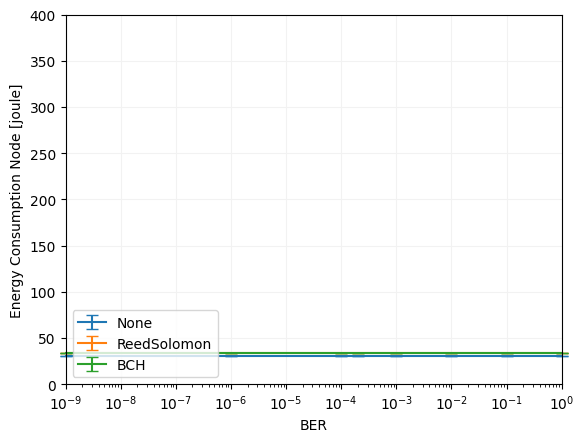

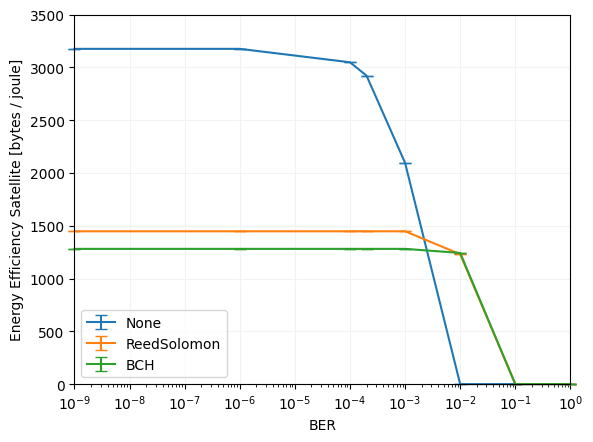

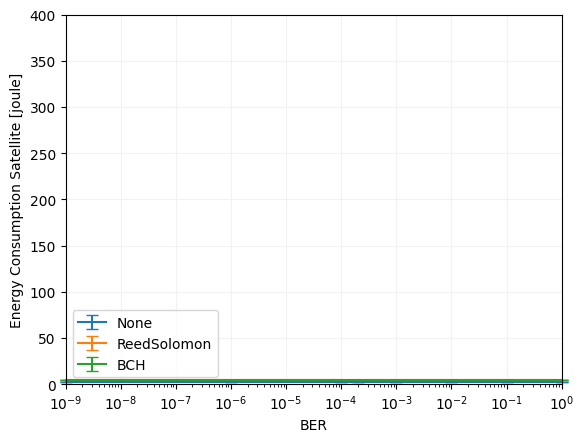

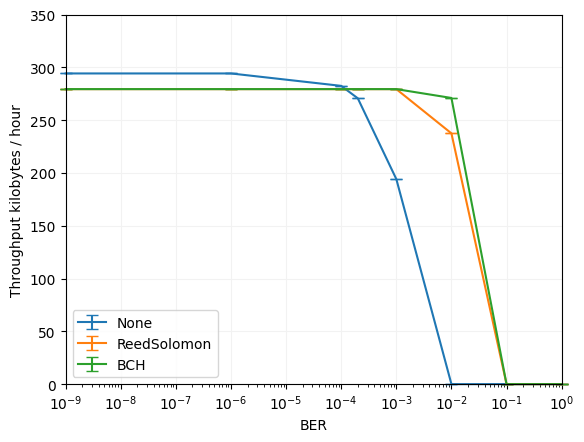

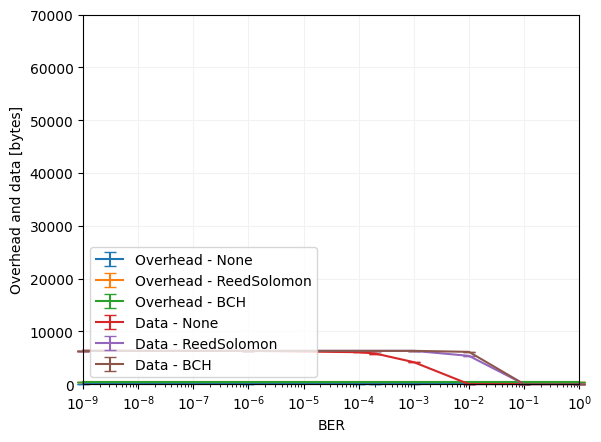

In [13]:
output_dir = "output_graphs"

def plot_runs(metric_names, label, ylims, is_log=False, show_metric_name=False):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for metric in metric_names:
        for channel_code in results:
            x = list(results[channel_code][metric].keys())[1:]
            ys = [results[channel_code][metric][BER] for BER in x]
            y = [np.average(y) for y in ys]
            yerr = [np.std(y) for y in ys]

            key_label = channel_code if not show_metric_name else f"{metric} - {channel_code}"
            plt.errorbar(x, y, yerr=yerr, label=key_label, capsize=4, clip_on=False)

    plt.ylabel(label)
    plt.xlabel("BER")
    plt.legend(loc="lower left")
    plt.grid(linestyle='-', color='0.95')

    if is_log:
        plt.yscale("log")
    plt.xscale("log")
    
    plt.ylim(ylims[0], ylims[1])
    plt.xlim(min(x), max(x))

    plt.savefig(os.path.join(output_dir, f"{label.replace(' ', '_').replace('/', '_')}.png"))
    plt.show()


metric = "Energy Efficiency Node"
plot_runs([metric], "Energy Efficiency Node [bytes / joule]", [0, 250])

metric = "Energy Consumption Node"
plot_runs([metric], "Energy Consumption Node [joule]", [0, 400])

metric = "Energy Efficiency Satellite"
plot_runs([metric], "Energy Efficiency Satellite [bytes / joule]", [0, 3500])

metric = "Energy Consumption Satellite"
plot_runs([metric], "Energy Consumption Satellite [joule]", [0, 400])

metric = "Throughput"
plot_runs([metric], "Throughput kilobytes / hour", [0, 350])

plot_runs(["Overhead", "Data"], "Overhead and data [bytes]", [0, 70000], show_metric_name=True)